In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks

In [2]:
norm_data = pd.read_csv('/home/ADF/ajl573/Data/interstellar_data/tracks_03/tracks_03_data.csv')
norm_data.head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,initial_feh_norm,log_initial_Yinit_norm,log_initial_Z_norm,frac_he_core_mass_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm,log_surface_he4_norm,log_surface_Z_norm
0,-1.880058,0.0,0.082728,-0.1,-0.066789,-0.074825,0.0,-1.734604,0.007556,-0.155094,0.229712,-0.006076,0.003246,-0.012479
1,-1.824820,0.0,0.082728,-0.1,-0.066789,-0.074825,0.0,-1.679366,0.007601,-0.154709,0.229138,-0.006265,0.003086,-0.012614
2,-1.766652,0.0,0.082728,-0.1,-0.066789,-0.074825,0.0,-1.621198,0.007644,-0.154313,0.228547,-0.006491,0.002894,-0.012777
3,-1.705793,0.0,0.082728,-0.1,-0.066789,-0.074825,0.0,-1.560340,0.007686,-0.153899,0.227932,-0.006767,0.002660,-0.012976
4,-1.642494,0.0,0.082728,-0.1,-0.066789,-0.074825,0.0,-1.497041,0.007731,-0.153461,0.227281,-0.007098,0.002381,-0.013213


In [3]:
tracks = Tracks()

In [4]:
factors = pd.read_csv('/home/ADF/ajl573/Data/interstellar_data/tracks_03/tracks_03_norm.csv')

In [5]:
data = tracks.renormalize(norm_data, factors)
del norm_data
data.head()

,log_frac_age,log_initial_mass,log_initial_MLT,initial_feh,log_initial_Yinit,log_initial_Z,frac_he_core_mass,log_star_age,log_effective_T,log_radius,log_delta_nu_fit,star_feh,log_surface_he4,log_surface_Z
0,-1.949058,0.0,0.361728,-0.1,-0.619789,-1.967825,0.0,-0.992604,3.760556,-0.060094,2.220712,-0.101076,-0.620754,-1.968479
1,-1.893820,0.0,0.361728,-0.1,-0.619789,-1.967825,0.0,-0.937366,3.760601,-0.059709,2.220138,-0.101265,-0.620914,-1.968614
2,-1.835652,0.0,0.361728,-0.1,-0.619789,-1.967825,0.0,-0.879198,3.760644,-0.059313,2.219547,-0.101491,-0.621106,-1.968777
3,-1.774793,0.0,0.361728,-0.1,-0.619789,-1.967825,0.0,-0.818340,3.760686,-0.058899,2.218932,-0.101767,-0.621340,-1.968976
4,-1.711494,0.0,0.361728,-0.1,-0.619789,-1.967825,0.0,-0.755041,3.760731,-0.058461,2.218281,-0.102098,-0.621619,-1.969213


In [6]:
data['log_g'] = 4.44 + data['log_initial_mass'] - 2 * data['log_radius']
data.head()

,log_frac_age,log_initial_mass,log_initial_MLT,initial_feh,log_initial_Yinit,log_initial_Z,frac_he_core_mass,log_star_age,log_effective_T,log_radius,log_delta_nu_fit,star_feh,log_surface_he4,log_surface_Z,log_g
0,-1.949058,0.0,0.361728,-0.1,-0.619789,-1.967825,0.0,-0.992604,3.760556,-0.060094,2.220712,-0.101076,-0.620754,-1.968479,4.560187
1,-1.893820,0.0,0.361728,-0.1,-0.619789,-1.967825,0.0,-0.937366,3.760601,-0.059709,2.220138,-0.101265,-0.620914,-1.968614,4.559418
2,-1.835652,0.0,0.361728,-0.1,-0.619789,-1.967825,0.0,-0.879198,3.760644,-0.059313,2.219547,-0.101491,-0.621106,-1.968777,4.558626
3,-1.774793,0.0,0.361728,-0.1,-0.619789,-1.967825,0.0,-0.818340,3.760686,-0.058899,2.218932,-0.101767,-0.621340,-1.968976,4.557799
4,-1.711494,0.0,0.361728,-0.1,-0.619789,-1.967825,0.0,-0.755041,3.760731,-0.058461,2.218281,-0.102098,-0.621619,-1.969213,4.556922


In [7]:
data['initial_mass'] = 10**data['log_initial_mass']

In [8]:
data['initial_Yinit'] = 10**data['log_initial_Yinit']

In [9]:
data['initial_MLT'] = 10**data['log_initial_MLT']

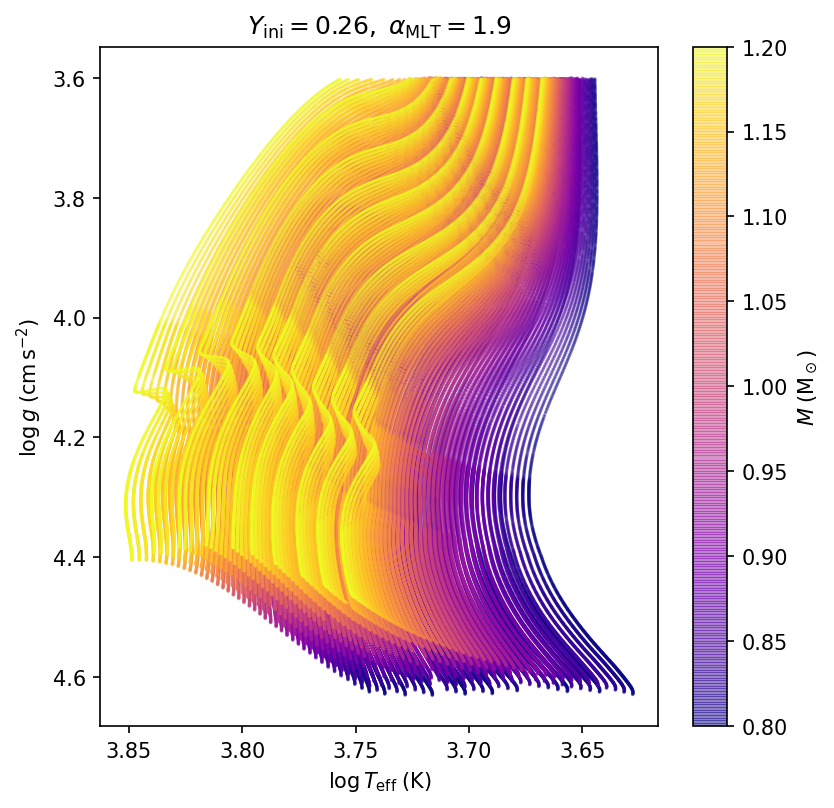

In [76]:
cond = (np.isclose(data['initial_Yinit'], 0.26)) & \
    (np.isclose(data['initial_MLT'], 1.9))

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

data[cond].sort_values('initial_mass').plot(x='log_effective_T', y='log_g',
          s=0.5, alpha=0.5, c='initial_mass', colormap='plasma',
          kind='scatter', ax=ax)

ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xlabel(r'$\log\,T_\mathrm{eff}\;(\mathrm{K})$')
ax.set_ylabel(r'$\log\,g\;(\mathrm{cm}\,\mathrm{s}^{-2})$')

fig.axes[1].set_ylabel(r'$M\;(\mathrm{M}_\odot)$')

ax.set_title(r'$Y_\mathrm{ini}=0.26,\;\alpha_\mathrm{MLT}=1.9$');

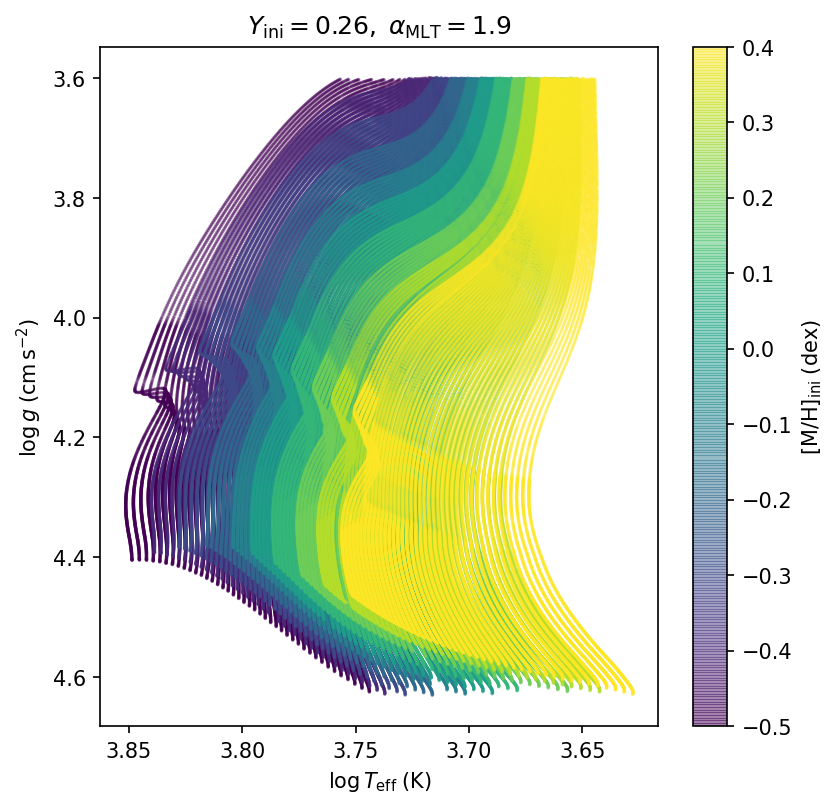

In [67]:
cond = (np.isclose(data['initial_Yinit'], 0.26)) & (np.isclose(data['initial_MLT'], 1.9))

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

data[cond].sort_values('initial_feh').plot(x='log_effective_T', y='log_g',
          s=0.5, alpha=0.5, c='initial_feh', colormap='viridis',
          kind='scatter', ax=ax)

ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xlabel(r'$\log\,T_\mathrm{eff}\;(\mathrm{K})$')
ax.set_ylabel(r'$\log\,g\;(\mathrm{cm}\,\mathrm{s}^{-2})$')

fig.axes[1].set_ylabel(r'$[\mathrm{M}/\mathrm{H}]_\mathrm{ini}\;(\mathrm{dex})$')

ax.set_title(r'$Y_\mathrm{ini}=0.26,\;\alpha_\mathrm{MLT}=1.9$');

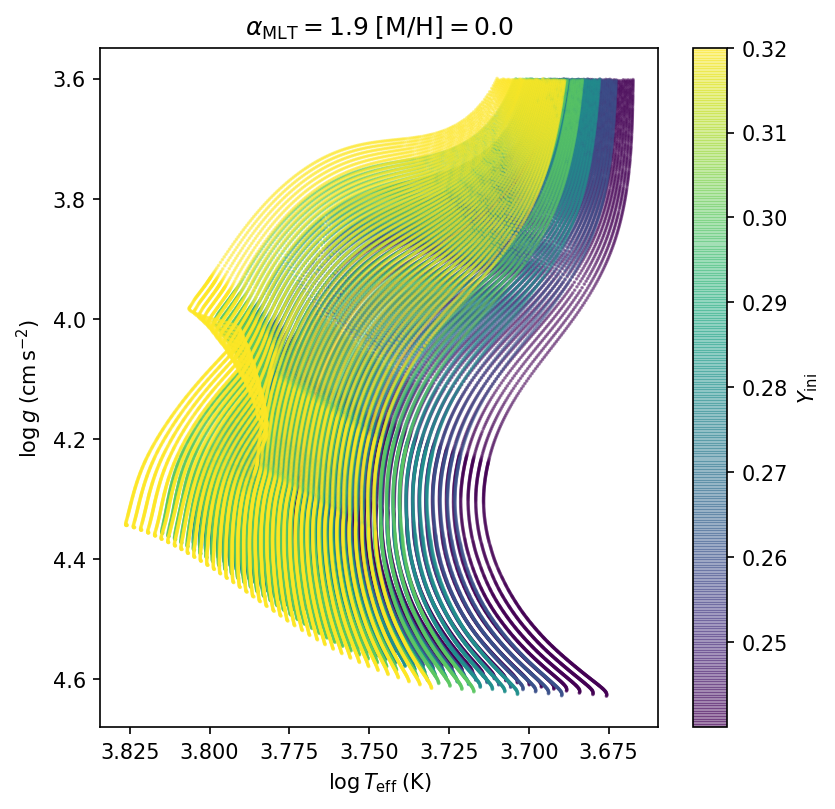

In [79]:
cond = (np.isclose(data['initial_feh'], 0.0)) & (np.isclose(data['initial_MLT'], 1.9))

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

data[cond].sort_values('initial_Yinit').plot(x='log_effective_T', y='log_g',
          s=0.5, alpha=0.5, c='initial_Yinit', colormap='viridis',
          kind='scatter', ax=ax)

ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xlabel(r'$\log\,T_\mathrm{eff}\;(\mathrm{K})$')
ax.set_ylabel(r'$\log\,g\;(\mathrm{cm}\,\mathrm{s}^{-2})$')

fig.axes[1].set_ylabel(r'$Y_\mathrm{ini}$')

ax.set_title(r'$\alpha_\mathrm{MLT}=1.9\;[\mathrm{M}/\mathrm{H}]=0.0$');

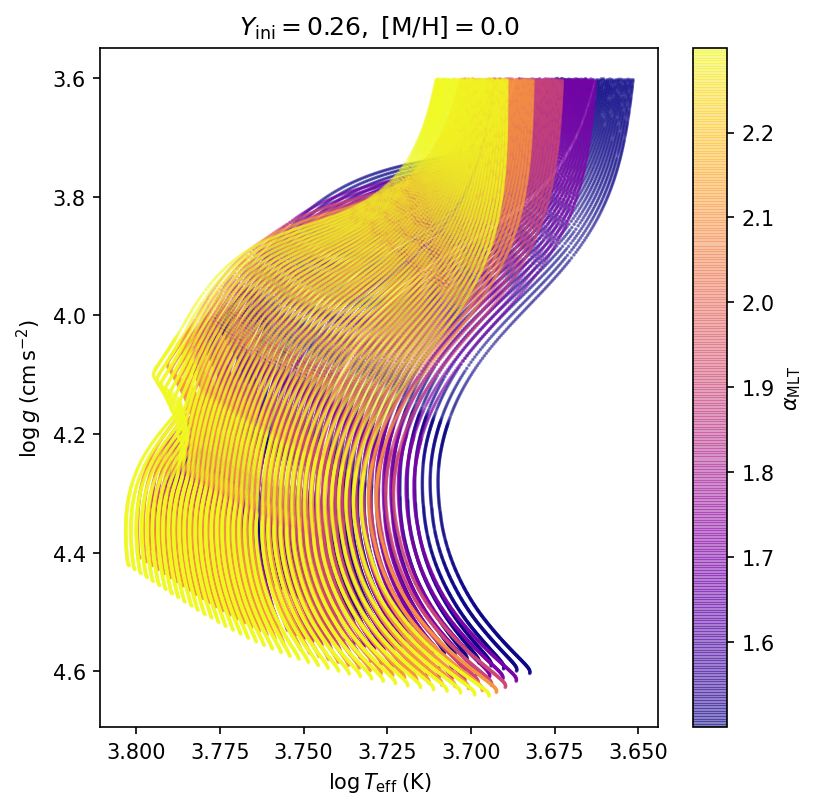

In [80]:
cond = (np.isclose(data['initial_feh'], 0.0))  & \
    (np.isclose(data['initial_Yinit'], 0.26))
#     (np.isclose(data['initial_mass'], 1.0))  # &\

fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

data[cond].sort_values('initial_MLT').plot(x='log_effective_T', y='log_g',
          s=0.5, alpha=0.5, c='initial_MLT', cmap='plasma',
          kind='scatter', ax=ax)

ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xlabel(r'$\log\,T_\mathrm{eff}\;(\mathrm{K})$')
ax.set_ylabel(r'$\log\,g\;(\mathrm{cm}\,\mathrm{s}^{-2})$')

fig.axes[1].set_ylabel(r'$\alpha_\mathrm{MLT}$')

ax.set_title(r'$Y_\mathrm{ini}=0.26,\;[\mathrm{M}/\mathrm{H}]=0.0$');